<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [3]:
dados = pd.read_csv('dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [4]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanho do dataset

In [5]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,1000.0,41985.600,12140.385408,13150.0,33112.50,41725.0,51175.0,73675.0
area,1000.0,124.326,72.389972,1.0,60.75,123.0,187.0,249.0
garagem,1000.0,2.009,0.813376,1.0,1.00,2.0,3.0,3.0
banheiros,1000.0,3.000,1.429701,1.0,2.00,3.0,4.0,5.0
lareira,1000.0,2.034,1.418752,0.0,1.00,2.0,3.0,4.0
marmore,1000.0,0.331,0.470809,0.0,0.00,0.0,1.0,1.0
andares,1000.0,0.485,0.500025,0.0,0.00,0.0,1.0,1.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

<Axes: >

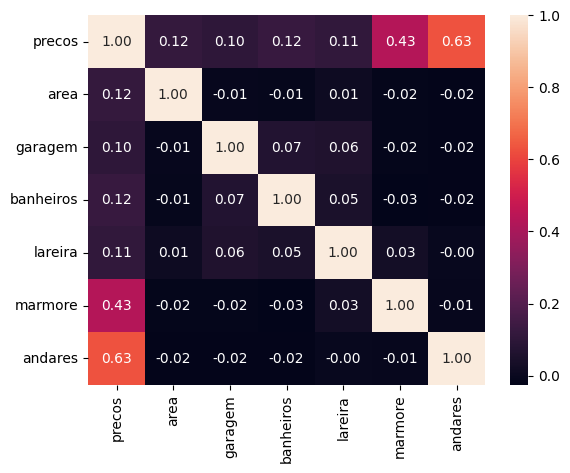

In [7]:
matriz = dados.corr()
sns.heatmap(matriz, annot=True, fmt='.2f')

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [8]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [110]:
sns.set_palette('Set2')
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 0, '$')

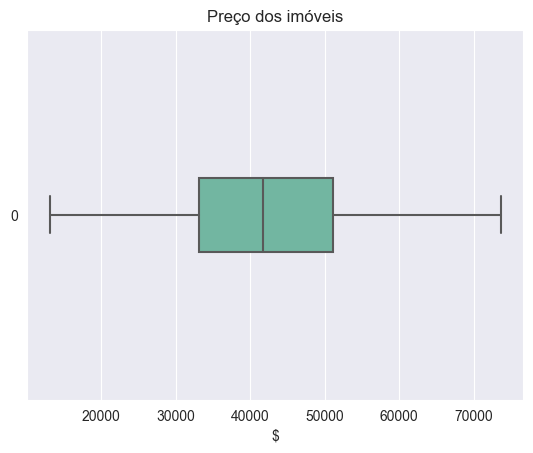

In [125]:
sns.boxplot(dados.precos, orient='h', width=0.2)
plt.title('Preço dos imóveis')
plt.xlabel('$')

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

In [11]:
dados.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

### Box-plot (Preço X Garagem)

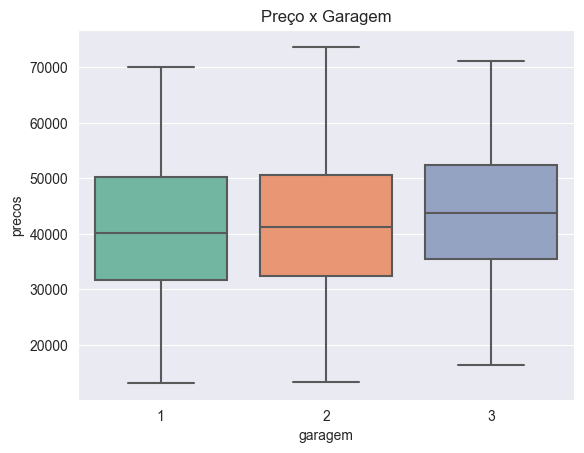

In [127]:
sns.boxplot(data=dados, x='garagem', y='precos')
plt.title('Preço x Garagem');

### Box-plot (Preço X Banheiros)

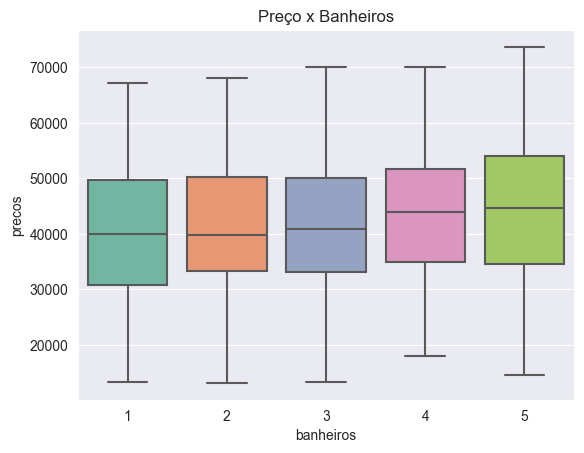

In [128]:
sns.boxplot(data=dados, x='banheiros', y='precos')
plt.title('Preço x Banheiros');

### Box-plot (Preço X Lareira)

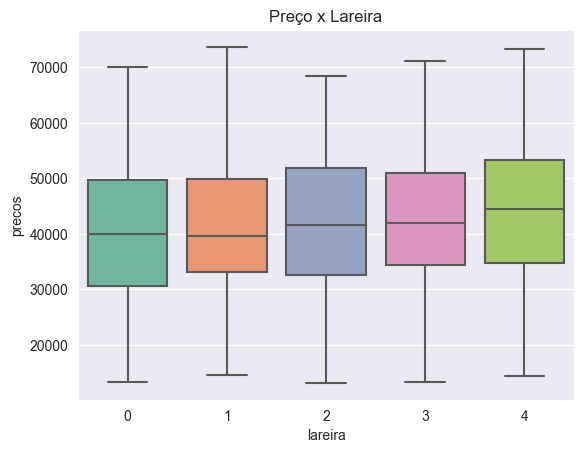

In [129]:
sns.boxplot(data=dados, x='lareira', y='precos')
plt.title('Preço x Lareira');

### Box-plot (Preço X Acabamento em Mármore)

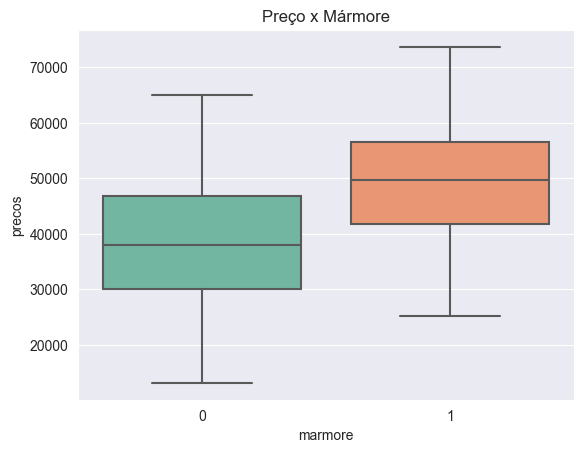

In [130]:
sns.boxplot(data=dados, x='marmore', y='precos')
plt.title('Preço x Mármore');

### Box-plot (Preço X Andares)

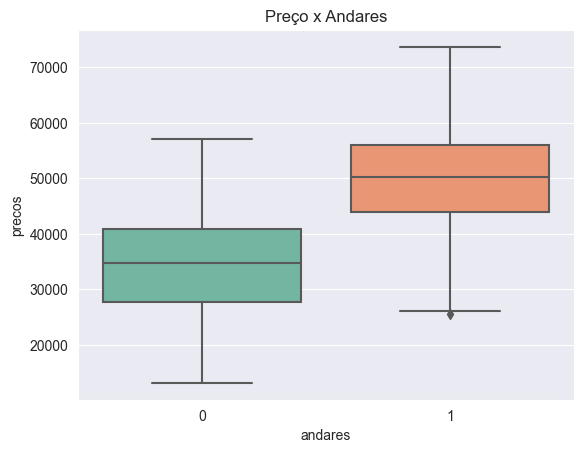

In [131]:
sns.boxplot(data=dados, x='andares', y='precos');
plt.title('Preço x Andares');

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\johnn\AppData\Local\Temp\ipykernel_15652\2827300167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados.precos)


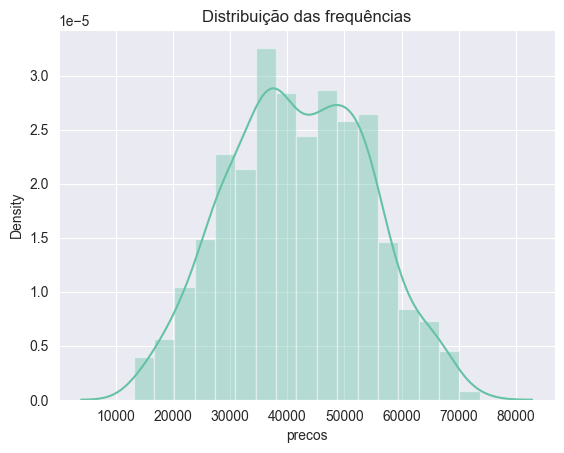

In [133]:
sns.distplot(dados.precos)
plt.title('Distribuição das frequências');

In [18]:
from scipy.stats import shapiro

_, p = shapiro(dados.precos)
alpha = 0.05

if p < alpha:
    print('Não segue uma distribuição normal')
else:
    print('Segue uma distribuição normal')

Não segue uma distribuição normal


## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

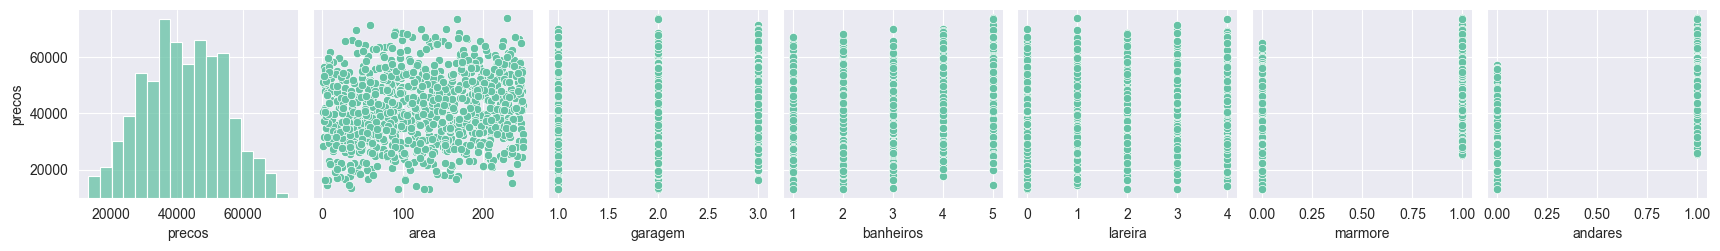

In [135]:
sns.pairplot(data= dados, y_vars='precos');

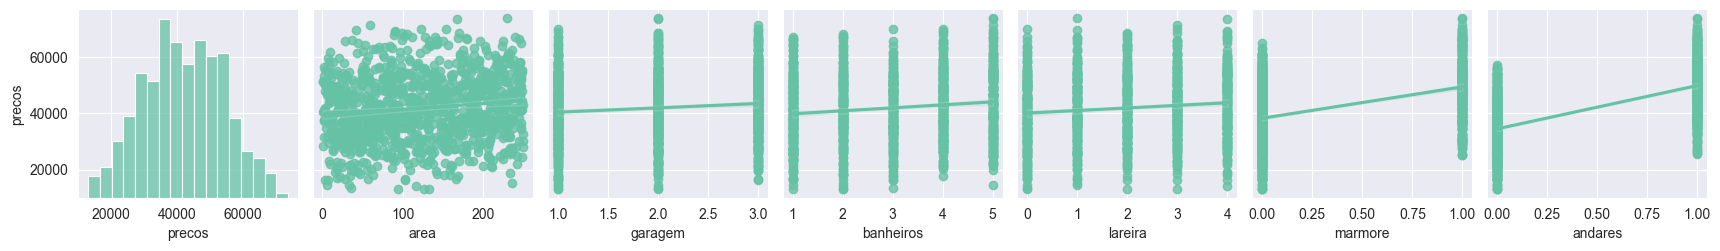

In [119]:
sns.pairplot(data= dados, y_vars='precos', kind='reg');

<Axes: >

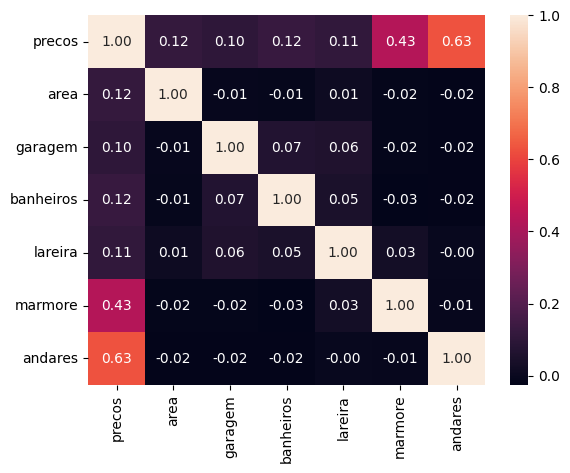

In [21]:
sns.heatmap(matriz, annot=True, fmt='.2f')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

In [90]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [57]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [58]:
y = dados.precos.values

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [75]:
X = dados[['andares', 'marmore']].values
X2 = dados.drop('precos', axis=1).values


## Criando os datasets de treino e de teste

In [76]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2)
X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2, y, test_size=0.2)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Instanciando a classe *LinearRegression()*

In [79]:
regressor = LinearRegression()
regressor2 = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [80]:
regressor.fit(X_treino, y_treino)
regressor2.fit(X2_treino, y2_treino)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [82]:
regressor.score(X_treino, y_treino), regressor2.score(X2_treino, y2_treino)

(0.5937932588336492, 0.6549731874130007)

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [83]:
pred = regressor.predict(X_teste)
pred2 = regressor2.predict(X2_teste)


## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [84]:
r2_score(y_teste, pred), r2_score(y2_teste, pred2)

(0.5439494560520888, 0.6117130052360962)

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [92]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [93]:
area = 128
garagem = 2
banheiros = 2
lareira = 0
marmore = 0
andares = 0
novo = [[marmore, andares]]
novo2 = [[area, garagem, banheiros, lareira, marmore, andares]]

resultado = regressor.predict(novo)
resultado2 = regressor2.predict(novo2)

resultado, resultado2

(array([30290.74174502]), array([27879.15766737]))

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
mabs = mean_absolute_error(y_teste, pred)
mabs2 = mean_absolute_error(y2_teste, pred2)

mse = mean_squared_error(y_teste, pred)
mse2 = mean_squared_error(y2_teste, pred2)

smse = np.sqrt(mean_squared_error(y_teste, pred))
smse2 = np.sqrt(mean_squared_error(y2_teste, pred2))

pd.DataFrame(index=['mabs', 'mabs2', 'mse', 'mse2', 'smse', 'smse2'], data=[mabs, mabs2, mse, mse2, smse, smse2]).round(2).T

,mabs,mabs2,mse,mse2,smse,smse2
0,6397.55,6155.87,62207203.73,51638566.9,7887.15,7186.0


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [103]:
import pickle

## Salvando o modelo estimado

In [105]:
with open('modelo_regressor_casas.pkl', 'wb') as f:
    pickle.dump(regressor2, f)

## Abrindo o modelo e prevendo um valor

In [106]:
with open('modelo_regressor_casas.pkl', 'rb') as f:
    modelo = pickle.load(f)

In [107]:
area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

In [109]:
modelo.predict(entrada)[0]

46981.098654934365